In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans

from sklearn import preprocessing

%pylab inline

import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sch

Populating the interactive namespace from numpy and matplotlib


In [2]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# The purpose of this notebook is to add as many features as we can imagine and see which ones are the most relevant

In [3]:
train = pd.read_csv('data/train_all_features.csv')

## Transform attributes in numeric values

In [4]:
train.columns

Index([u'CUST_COD', u'LIMIT_BAL', u'SEX', u'PAY_DEC', u'PAY_NOV', u'PAY_OCT',
       u'PAY_SEP', u'PAY_AUG', u'PAY_JUL', u'BILL_AMT_DEC', u'BILL_AMT_NOV',
       u'BILL_AMT_OCT', u'BILL_AMT_SEP', u'BILL_AMT_AUG', u'BILL_AMT_JUL',
       u'PAY_AMT_DEC', u'PAY_AMT_NOV', u'PAY_AMT_OCT', u'PAY_AMT_SEP',
       u'PAY_AMT_AUG', u'PAY_AMT_JUL', u'DEFAULT PAYMENT JAN', u'SEX_MISSING',
       u'EDUCATION_MISSING', u'EDUCATION_graduate school',
       u'EDUCATION_high school', u'EDUCATION_other', u'EDUCATION_university',
       u'MARRIAGE_MISSING', u'MARRIAGE_married', u'MARRIAGE_other',
       u'MARRIAGE_single', u'AGE_MISSING', u'AGE', u'LIMIT-MEAN_BILL',
       u'AVG_PAY_LAST_2', u'AVG_PAY_LAST_3', u'AVG_PAY_LAST_4',
       u'AVG_PAY_LAST_5', u'AVG_PAY_LAST_6', u'PAY_TREND', u'PAY_SKEW',
       u'PAY_KURT', u'AVG_BILL_AMT_LAST_2', u'AVG_BILL_AMT_LAST_3',
       u'AVG_BILL_AMT_LAST_4', u'AVG_BILL_AMT_LAST_5', u'AVG_BILL_AMT_LAST_6',
       u'BILL_AMT_TREND', u'BILL_AMT_SKEW', u'BILL_AMT_KURT',

### Drop CUST_COD

We won't use it, at the moment

In [5]:
train = train.drop(['CUST_COD'], axis=1)

## Transform SEX

In [6]:
#train['SEX_MISSING'] = train['SEX'].isnull()*1      # Add a column to say if sex was missing or not
#train.loc[train['SEX'].isnull(), 'SEX'] = 'F' # Predict sex with majority class
#train['SEX'] = train['SEX'].apply(lambda x : 0 if x == 'M' else 1)   # Convert to M -> 0, F -> 1

## Transform EDUCATION

In [7]:
#train['EDUCATION_MISSING'] = train['EDUCATION'].isnull() * 1 # Add a column to say if education was missing or not
#train['EDUCATION'] = train['EDUCATION'].fillna('other')    # Predict missing values as other

#train = pd.get_dummies(train, columns=['EDUCATION'])   # Get one hot vector for education

## Trasform MARRIAGE

In [8]:
#train['MARRIAGE_MISSING'] = train['MARRIAGE'].isnull() * 1 # Add a column to say if education was missing or not
#train['MARRIAGE'] = train['MARRIAGE'].fillna('other')    # Predict missing values as other
#train = pd.get_dummies(train, columns=['MARRIAGE'])   # Get one hot vector for education

## Transform BIRTH_DATE

In [9]:
#train['AGE_MISSING'] = train['BIRTH_DATE'].isnull() * 1

In [10]:
#import datetime

#birthdates = train['BIRTH_DATE']

#def get_age(date):
#   try:
#        return (datetime.datetime.today() - datetime.datetime.strptime(date, '%d/%m/%Y')).days//365
#    except Exception as e:
#        return date

#birthdates = birthdates.apply(get_age)

In [11]:
#birthdates.describe()

In [12]:
# Fill NA with mean value
#birthdates = birthdates.fillna(36)

In [13]:
#train['AGE'] = birthdates
#train = train.drop(['BIRTH_DATE'], axis=1)

## Transform all columns in float

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 82 columns):
LIMIT_BAL                    26884 non-null float64
SEX                          26884 non-null float64
PAY_DEC                      26884 non-null float64
PAY_NOV                      26884 non-null float64
PAY_OCT                      26884 non-null float64
PAY_SEP                      26884 non-null float64
PAY_AUG                      26884 non-null float64
PAY_JUL                      26884 non-null float64
BILL_AMT_DEC                 26884 non-null float64
BILL_AMT_NOV                 26884 non-null float64
BILL_AMT_OCT                 26884 non-null float64
BILL_AMT_SEP                 26884 non-null float64
BILL_AMT_AUG                 26884 non-null float64
BILL_AMT_JUL                 26884 non-null float64
PAY_AMT_DEC                  26884 non-null float64
PAY_AMT_NOV                  26884 non-null float64
PAY_AMT_OCT                  26884 non-null float64
PAY_AMT

In [15]:
train = train.astype('float64')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 82 columns):
LIMIT_BAL                    26884 non-null float64
SEX                          26884 non-null float64
PAY_DEC                      26884 non-null float64
PAY_NOV                      26884 non-null float64
PAY_OCT                      26884 non-null float64
PAY_SEP                      26884 non-null float64
PAY_AUG                      26884 non-null float64
PAY_JUL                      26884 non-null float64
BILL_AMT_DEC                 26884 non-null float64
BILL_AMT_NOV                 26884 non-null float64
BILL_AMT_OCT                 26884 non-null float64
BILL_AMT_SEP                 26884 non-null float64
BILL_AMT_AUG                 26884 non-null float64
BILL_AMT_JUL                 26884 non-null float64
PAY_AMT_DEC                  26884 non-null float64
PAY_AMT_NOV                  26884 non-null float64
PAY_AMT_OCT                  26884 non-null float64
PAY_AMT

In [17]:
x = train.drop(['DEFAULT PAYMENT JAN'], axis=1)
y = train['DEFAULT PAYMENT JAN']
selection = train[['LIMIT_BAL', 'PAY_AMT_TREND']]

In [18]:
selection = normalize(selection)
selection.head()

,LIMIT_BAL,PAY_AMT_TREND
0,0.040404,0.219361
1,0.181818,0.221739
2,0.202020,0.223522
3,0.292929,0.214178
4,0.111111,0.217753


In [19]:
selection.describe()

,LIMIT_BAL,PAY_AMT_TREND
count,26884.000000,26884.000000
mean,0.159231,0.217945
std,0.131448,0.014971
min,0.000000,0.000000
25%,0.040404,0.217054
50%,0.131313,0.217838
75%,0.232323,0.219016
max,1.000000,1.000000


In [20]:
z = linkage(selection, 'centroid')

In [24]:
wss_values = []
bss_values = []
k_values = range(1,10)

for k in k_values:
    clustering = fcluster(z, k, criterion='maxclust')
    centroids_h = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(x, centroids_h, 'euclidean')
    D = cdist(x, centroids_h, 'euclidean')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/x.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(x)**2)/x.shape[0]

    bss = tss-wss

    wss_values += [wss]
    bss_values += [bss]

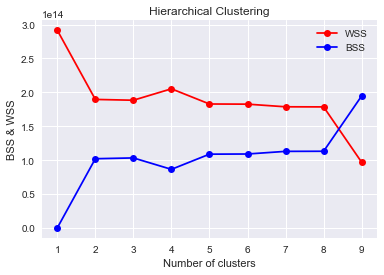

In [25]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

In [21]:
def KneeElbowAnalysis(x,max_k=10):
    k_values = range(2,max_k)
    clusterings = [KMeans(n_clusters=k, random_state=12334, n_jobs=4).fit(x) for k in k_values]
    print 'step1'
    centroids_k = [clustering.cluster_centers_ for clustering in clusterings]
    print 'step2'
    silo = [metrics.silhouette_score(selection, labels.labels_, metric='euclidean') for labels in clusterings]
    print 'step3'
    print centroids_k

    D_k = [cdist(x, cent, 'euclidean') for cent in centroids_k]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/x.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]

    tss = sum(pdist(x)**2)/x.shape[0]
    bss = tss-wcss

    kIdx = 10-1
    
    #
    # elbow curve
    #
    fig = plt.figure()
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.plot(k_values, wcss, 'bo-', color='red', label='WCSS')
    plt.plot(k_values, bss, 'bo-', color='blue', label='BCSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.legend()
    plt.title('Knee for KMeans clustering');
    
    print silo




In [22]:
#yp = KMeans(n_clusters=10).fit_predict(x)

step1
step2
step3
[array([[ 0.32684152,  0.2178334 ],
       [ 0.08824997,  0.21799247]]), array([[ 0.20791083,  0.21790225],
       [ 0.05658791,  0.21795297],
       [ 0.40609087,  0.21802089]]), array([[ 0.04564729,  0.21793858],
       [ 0.29441267,  0.21817158],
       [ 0.16591858,  0.21793735],
       [ 0.46237039,  0.2174727 ]]), array([[ 0.32532931,  0.21868566],
       [ 0.03615811,  0.21799164],
       [ 0.20525004,  0.21777057],
       [ 0.48017793,  0.21668846],
       [ 0.11715133,  0.21793112]]), array([[ 0.25754582,  0.21793574],
       [ 0.03038607,  0.21796985],
       [ 0.17504514,  0.21788008],
       [ 0.49497219,  0.21704525],
       [ 0.09677474,  0.21792708],
       [ 0.35911677,  0.21853652]]), array([[ 0.28104794,  0.21789383],
       [ 0.07907712,  0.21790608],
       [ 0.49497219,  0.21704525],
       [ 0.14196207,  0.21811527],
       [ 0.20913434,  0.21775317],
       [ 0.02780843,  0.21795592],
       [ 0.36483715,  0.21855067]]), array([[ 0.28362605,  0.

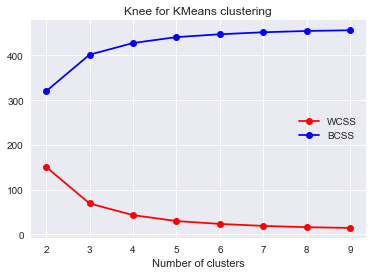

In [23]:
KneeElbowAnalysis(selection,10)

In [20]:
kmeans_model = KMeans(n_clusters=7, random_state=12334, n_jobs=4).fit(selection)
labels = kmeans_model.labels_
metrics.silhouette_score(selection, labels, metric='euclidean')

0.39605304842587735